In [10]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

BLUE, GREEN, RED, END = '\033[94m\033[1m', '\033[92m\033[1m', '\033[91m\033[1m', '\033[0m'
# 1. DATA COLLECTION
print(f"{BLUE}--- 1. DATA COLLECTION ---{END}")
df = pd.read_csv('WineQT.csv')
print(f"✔ Dataset 'WineQT.csv' loaded successfully. Total records: {len(df)}")

--- 1. DATA COLLECTION ---
✔ Dataset 'WineQT.csv' loaded successfully. Total records: 1143


In [11]:
# 2. DATA EXPLORATION AND CLEANING
print(f"\n{BLUE}--- 2. DATA EXPLORATION AND CLEANING ---{END}")
print(f"Checking for missing chemical values:\n{df[['density', 'fixed acidity', 'volatile acidity']].isnull().sum()}")

df.drop('Id', axis=1, inplace=True, errors='ignore')
df.drop_duplicates(inplace=True)
print(f"{GREEN}✔ Cleaning complete. Redundant data removed.{END}")


--- 2. DATA EXPLORATION AND CLEANING ---
Checking for missing chemical values:
density             0
fixed acidity       0
volatile acidity    0
dtype: int64
✔ Cleaning complete. Redundant data removed.


In [12]:
# 3. FEATURE ENGINEERING
print(f"\n{BLUE}--- 3. FEATURE ENGINEERING ---{END}")
# Standardizing chemical scales for sensitive algorithms like SVC and SGD
X = df.drop('quality', axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✔ Feature Engineering: Chemical predictors standardized.")


--- 3. FEATURE ENGINEERING ---
✔ Feature Engineering: Chemical predictors standardized.


In [7]:
# 4. MODEL TRAINING
print(f"\n{BLUE}--- 4. CLASSIFIER MODELS ---{END}")
# Classifier Models: Utilizing Random Forest, Stochastic Gradient Descent (SGD), and Support Vector Classifier (SVC)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. Random Forest
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

# 2. Stochastic Gradient Descent
sgd_model = SGDClassifier(random_state=42).fit(X_train, y_train)

# 3. Support Vector Classifier (SVC)
svc_model = SVC(random_state=42).fit(X_train, y_train)

print(f"{GREEN}✔ Classifier Models (Random Forest, SGD, SVC) trained successfully.{END}")


--- 4. CLASSIFIER MODELS ---
✔ Classifier Models (Random Forest, SGD, SVC) trained successfully.


In [8]:
# 5. MODEL EVALUATION
print(f"\n{BLUE}--- 5. MODEL EVALUATION ---{END}")
y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest Prediction Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))


--- 5. MODEL EVALUATION ---
Random Forest Prediction Accuracy: 0.5441

Detailed Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.60      0.67      0.63        84
           6       0.48      0.59      0.53        74
           7       0.61      0.44      0.51        25
           8       0.00      0.00      0.00         7

    accuracy                           0.54       204
   macro avg       0.28      0.28      0.28       204
weighted avg       0.50      0.54      0.52       204




--- 6. DATA VISUALIZATION ---


/tmp/ipykernel_475/4104179225.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, palette='Set2')


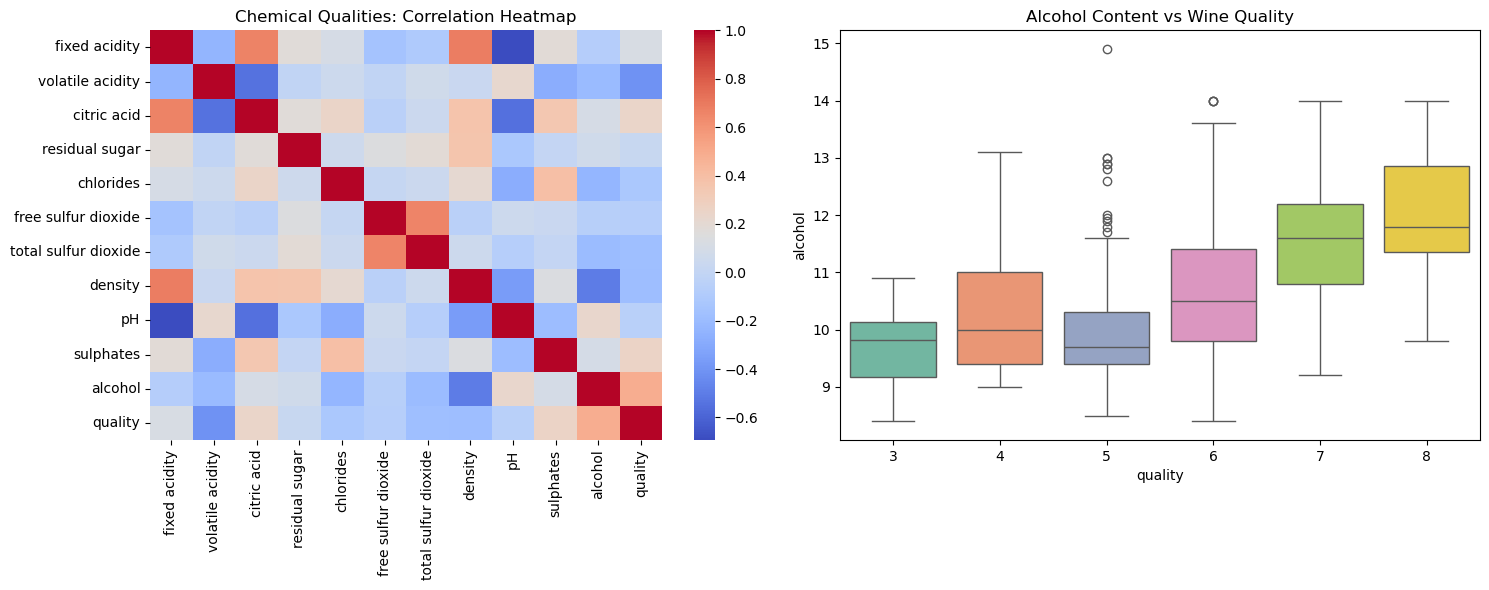

In [9]:
# 6. DATA VISUALIZATION
print(f"\n{BLUE}--- 6. DATA VISUALIZATION ---{END}")
# Data Visualization: Using Seaborn and Matplotlib for visualizing patterns and insights
plt.figure(figsize=(15, 6))

# Plot 1: Visualizing Chemical Correlations
plt.subplot(1, 2, 1)
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Chemical Qualities: Correlation Heatmap')

# Plot 2: Quality Insights
plt.subplot(1, 2, 2)
sns.boxplot(x='quality', y='alcohol', data=df, palette='Set2')
plt.title('Alcohol Content vs Wine Quality')

plt.tight_layout()
plt.show()